In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'serif',
          'text.latex.unicode': True,
          'axes.titlesize' : 24,
'axes.labelsize' : 20,
'lines.linewidth' : 2,
'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
          }
plt.rcParams.update(params) 
%config InlineBackend.figure_formats=['pdf', 'retina']
%matplotlib inline

/usr/local/Cellar/python@3.8/3.8.3_1/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


In [2]:
# Test the figure gen

from tensorboard.backend.event_processing import event_accumulator

In [12]:
import os
def plot_curve(ax, prefix,
               entry='optimizer/loss',
               logpath="logs/",
               dataset="sphere_bignoise_vertex3",
               legend=None, marker="",
               xaxis="time",
               expr_id=0
              ):
    entry_path = os.path.join(logpath, prefix + "-" + dataset + "_" + str(expr_id))
    event_file = os.path.join(entry_path, os.listdir(entry_path)[0])
    ea = event_accumulator.EventAccumulator(event_file)
    ea.Reload()
    values = ea.Scalars(entry)
    loss = np.fromiter(map(lambda x: x.value, values), np.float)
    if xaxis == 'time':
        x = np.fromiter(map(lambda x: x.wall_time, values), np.float)
        x0 = x[0]
        x = x - x0
    else:
        x = np.fromiter(map(lambda x: x.step, values), np.int)
    if not legend is None:
        ax.plot(x, loss, label=legend, alpha=0.7, marker=marker)
    else:
        ax.plot(x, loss, marker=marker)

In [13]:
datasets = ["rim", "cubicle", "grid3d", "torus3d", "garage", "sphere"]
dataset_names = { "rim": "Rim", "cubicle": "Cubicle", "grid3d": "Grid3D", "torus3d": "Torus3D", "garage": "Garage", "sphere": "Sphere" }
prefixes = ["default", "quat", "rot3", "full"]
labels = { "default": "Default", "quat": "Quaternion", "rot3": "Full Rot3", "full": "Full Pose3" }
markers = { "default": "", "quat": "o", "rot3": "", "full": "" }

def plot_dataset(ax, dataset, expr_id, init=False):
    for p in prefixes:
        prefix = p
        if init:
            prefix = prefix + "_init"
        plot_curve(ax, prefix, legend=labels[p], marker=markers[p], dataset=dataset, expr_id=expr_id)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/quat-sphere_0'

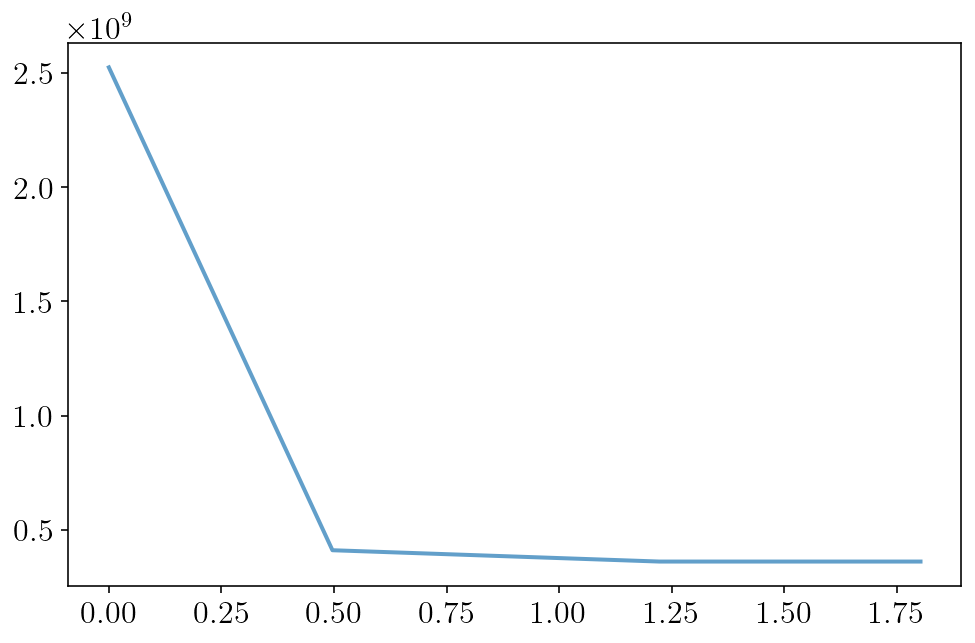

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[5], 0)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Rim")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

In [ ]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i])
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("GTSAM on " + dataset_names[datasets[i]])
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Loss");

fig.tight_layout()

# Chordal

In [12]:
datasets = ["rim", "cubicle", "grid3D", "torus3D", "parking-garage", "sphere_bignoise_vertex3"]

prefixes = ["default", "quat", "rot3", "full"]

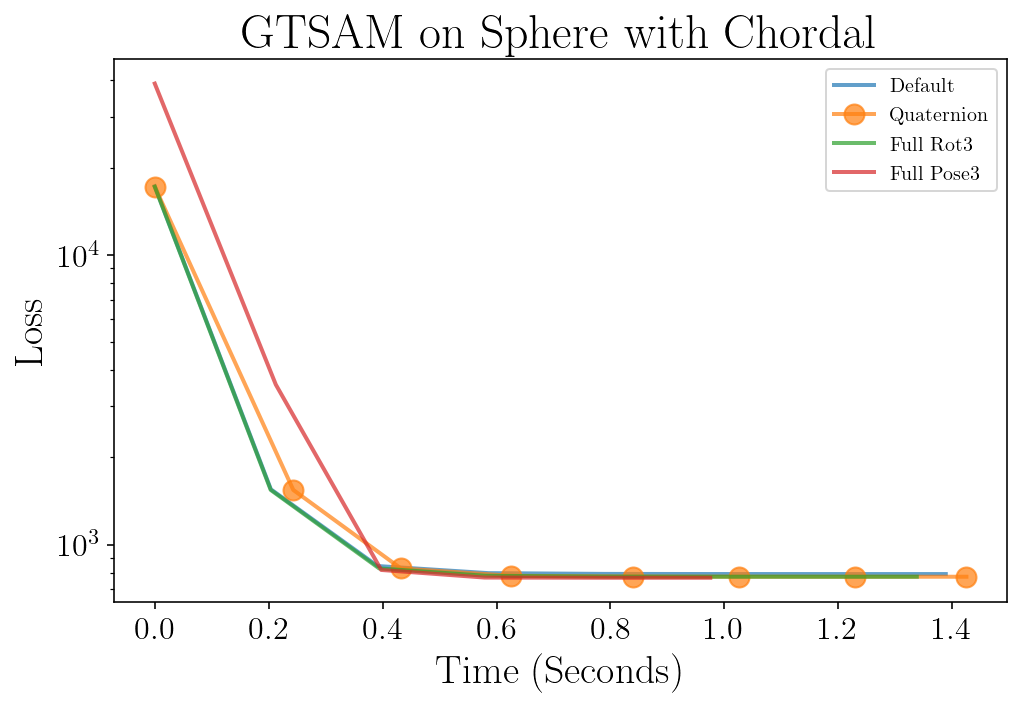

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
plot_dataset(ax, datasets[5], init=True)
ax.set_yscale("log")
ax.legend()
ax.set_title("GTSAM on Sphere with Chordal")
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("Loss");

In [ ]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i], init=True)
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("GTSAM on " + dataset_names[datasets[i]] + " with Chordal")
    ax.set_xlabel("Time (Seconds)")
    ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10, numdecs=3, subs=np.arange(0, 10, 0.5)))
    ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, numdecs=0, subs=np.arange(0, 10, 1) + 0.2))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter(""))
    ax.set_ylabel("Loss");

fig.tight_layout()

# SwiftFusion

In [16]:
datasets = ["rim", "cubicle", "grid3D", "torus3D", "parking-garage", "sphere_bignoise_vertex3"]

prefixes = ["sf_btw", "sf_init", "full_cg", "full_init_cg"]
labels = { "sf_btw": "SwiftFusion", "sf_chor": "Frobenius", "sf_init": "SwiftFusion+Chordal", "full_cg": "GTSAM", "full_init_cg": "GTSAM+Chordal" }
markers = { "sf_btw": "o", "sf_chor": "o", "sf_init": "o", "full_cg": "o", "full_init_cg": "o"}

In [ ]:
fig, axs = plt.subplots(6, figsize=(8, 30))

for i in range(6):
    ax = axs[i]
    plot_dataset(ax, datasets[i])
    ax.set_yscale("log")
    ax.legend()
    ax.set_title("SwiftFusion on " + dataset_names[datasets[i]])
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Loss");

fig.tight_layout()

# Randomized Tests

## Normal (No Chordal)